# Histology Image

In [32]:
import cv2
import matplotlib.pyplot as plt

## Load, convert to grayscale, resize

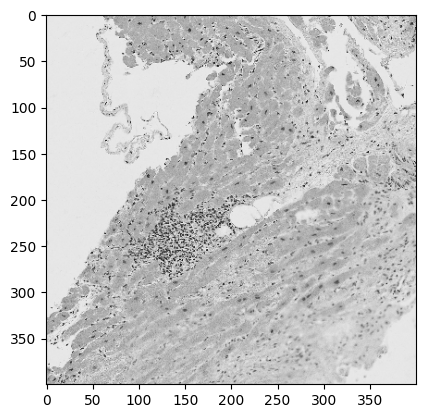

In [33]:
img = cv2.imread("hist.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (400, 400)) # linear interpolation

plt.imshow(img, cmap="gray")

## Reduce Noise by Blurring

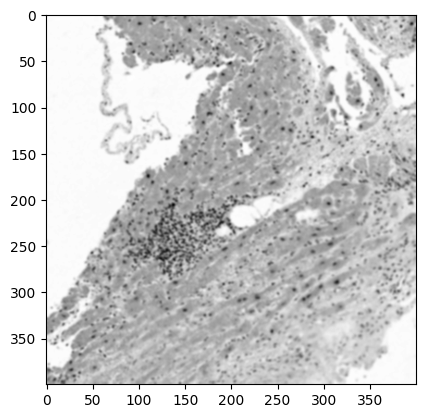

In [42]:
filtered = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(filtered, cmap="gray")

## Binarization

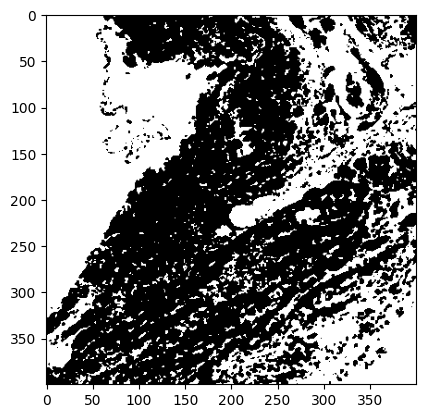

In [36]:
_, bin_img = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap="gray")

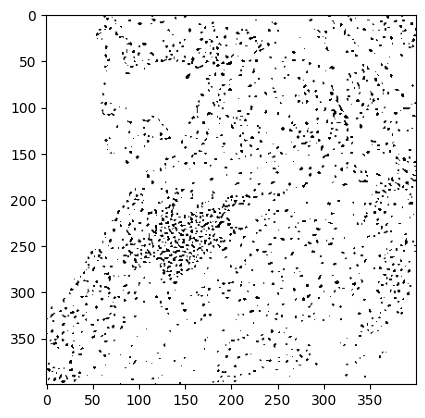

In [43]:
bin_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
plt.imshow(bin_img, cmap="gray")